In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet
!pip install plotly

import plotly.graph_objects as go

In [4]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot

In [35]:
countries=["ARG", "AUT", "BEL", "BGD", "BGR", "BOL", "BRA", "CAN", "CHN", "COL",
"CZE", "DEU", "DNK", "ECU", "ESP", "FRA", "FIN", "GBR", "GTM", "IND", 
"IRN", "ITA", "JPN", "MEX", "PER", "RUS", "SWE", "USA", "VEN"]

indicators=['CH4','CO','NO2','O3','SO2']

In [37]:
countries=['ITA']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

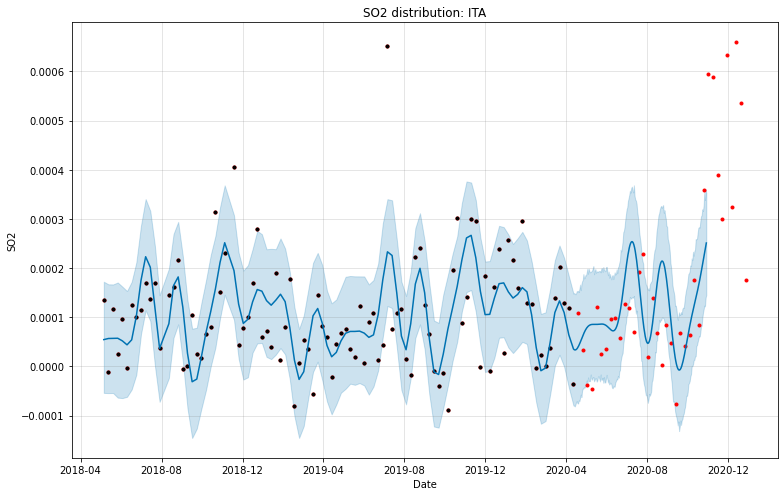

In [38]:
for country in countries:
    for indicator in indicators:
        df=pd.read_pickle('2018_2020_O3_NO2_SO2_CO_CH4_all_with nan_3.pkl')[country]
        df.time= pd.to_datetime(df.time)
        usa=df.dropna(subset=['time',indicator]).sort_values(by='time',ascending=True).reset_index(drop=True)
        usa.rename(columns={'time':'ds',indicator:'y'}, inplace=True)
        usa_short=usa.iloc[:100]
        m_short = Prophet(yearly_seasonality=True)
        m_short.fit(usa_short)
        future_short= m_short.make_future_dataframe(periods=200)
        forecast_s = m_short.predict(future_short)
        %matplotlib inline
        pyplot.figure(figsize=(11,7))
        ax = pyplot.subplot()
        #ax.scatter
        ax.set_title(indicator+' distribution: '+country)
        ax.plot(usa['ds'], usa['y'],'r.',label='Observed data')
        fig1s= m_short.plot(forecast_s,ax=ax, figsize=(20, 20),xlabel='Date', ylabel=indicator,plot_cap=True)
        fig1s.savefig('img/'+country+'_'+indicator)

# Create image stack

In [112]:
import sys
from PIL import Image
from os import listdir
from os.path import isfile, join

In [114]:
onlyfiles = [f for f in listdir('img/') if isfile(join('img/', f))]
onlyfiles

['ITA_SO2.png', 'ITA_O3.png', 'ITA_CO.png', 'ITA_NO2.png', 'ITA_CH4.png']

In [131]:

images = [Image.open(x) for x in ['img/ITA_CH4.png', 'img/ITA_O3.png', 'img/ITA_SO2.png','img/ITA_CO.png','img/ITA_NO2.png']]
widths, heights = zip(*(i.size for i in images))

total_width = 3*max(widths)
max_height = 2*max(heights)

new_im = Image.new('RGBA', (total_width, max_height))

x_offset = 0

for i in range(0,5):
    if i<3:
        new_im.paste(images[i], (x_offset,0))
        x_offset += images[i].size[0]
    if i==2:
        x_offset = 395
    if i>2:
        new_im.paste(images[i], (x_offset,max(heights)))
        x_offset += images[i].size[0]

new_im.save('img/ITA.png')

In [132]:
img=Image.open('img/ITA.png')

In [133]:
img.size

(2376, 1008)

In [134]:
new_img=img.resize((int(2376/2),int(1008/2)))

In [136]:
new_img.save('img/ITA.png')

In [137]:
new_img.size

(1188, 504)